In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
with open('C:\sample_intern\wallet_credit_scores.json', 'r') as f:
    warnings.filterwarnings('ignore')
    data = json.load(f)


In [20]:
df = pd.DataFrame(data)

In [21]:
bins = list(range(0, 1100, 100))
labels = [f"{i}-{i+99}" for i in bins[:-1]]

df['rb_score_range'] = pd.cut(df['rule_based_score'], bins=bins, labels=labels, include_lowest=True)
df['ml_score_range'] = pd.cut(df['credit_score'], bins=bins, labels=labels, include_lowest=True)

rb_counts = df['rb_score_range'].value_counts().sort_index()
ml_counts = df['ml_score_range'].value_counts().sort_index()


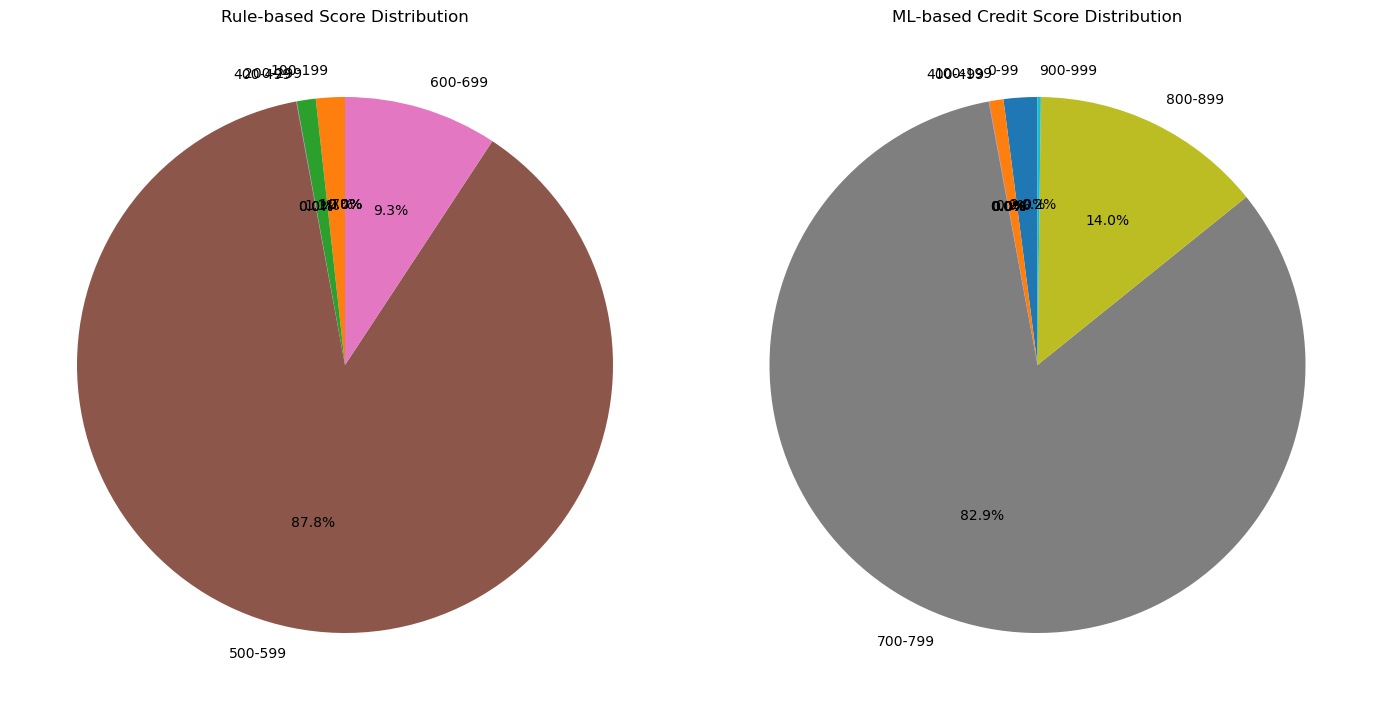

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

rb_counts.plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90, title='Rule-based Score Distribution', colormap='tab10')
ax[0].set_ylabel('')
ml_counts.plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90, title='ML-based Credit Score Distribution', colormap='tab10')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

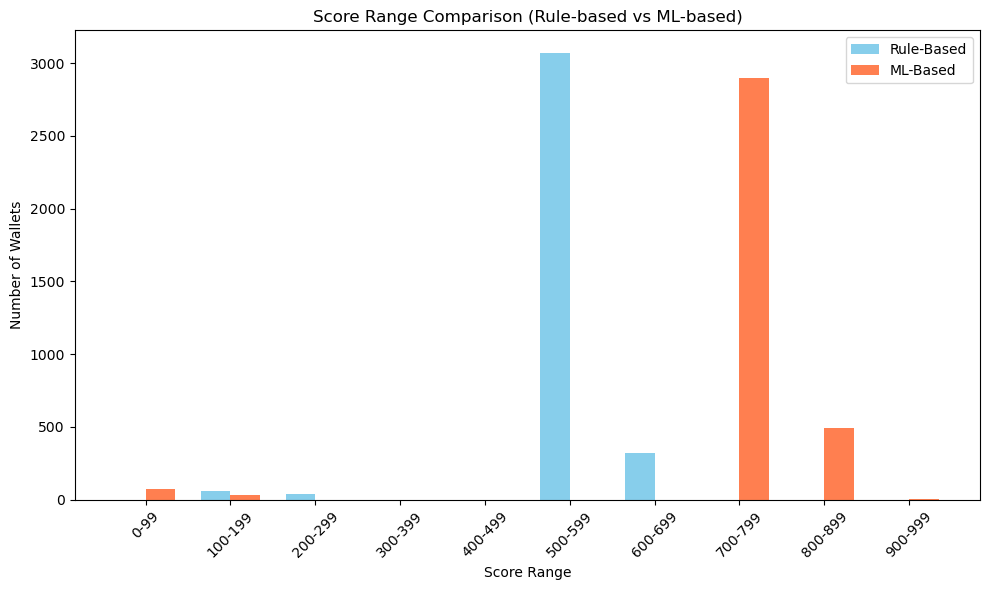

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = range(len(labels))

ax.bar(x, rb_counts.values, width=width, label='Rule-Based', color='skyblue')
ax.bar([i + width for i in x], ml_counts.values, width=width, label='ML-Based', color='coral')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Score Range')
ax.set_ylabel('Number of Wallets')
ax.set_title('Score Range Comparison (Rule-based vs ML-based)')
ax.legend()
plt.tight_layout()
plt.show()

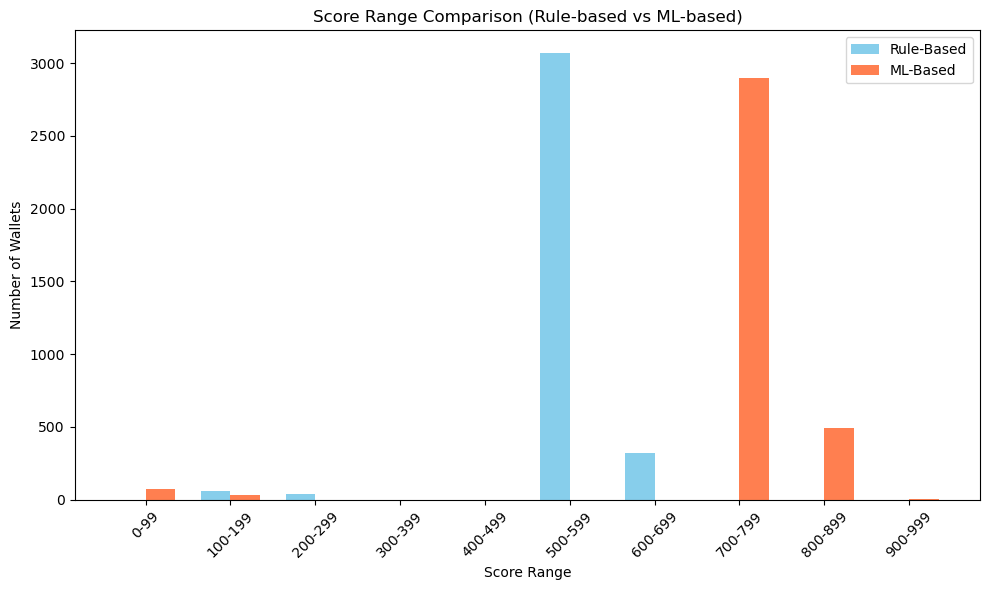

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = range(len(labels))

ax.bar(x, rb_counts.values, width=width, label='Rule-Based', color='skyblue')
ax.bar([i + width for i in x], ml_counts.values, width=width, label='ML-Based', color='coral')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Score Range')
ax.set_ylabel('Number of Wallets')
ax.set_title('Score Range Comparison (Rule-based vs ML-based)')
ax.legend()
plt.tight_layout()
plt.show()


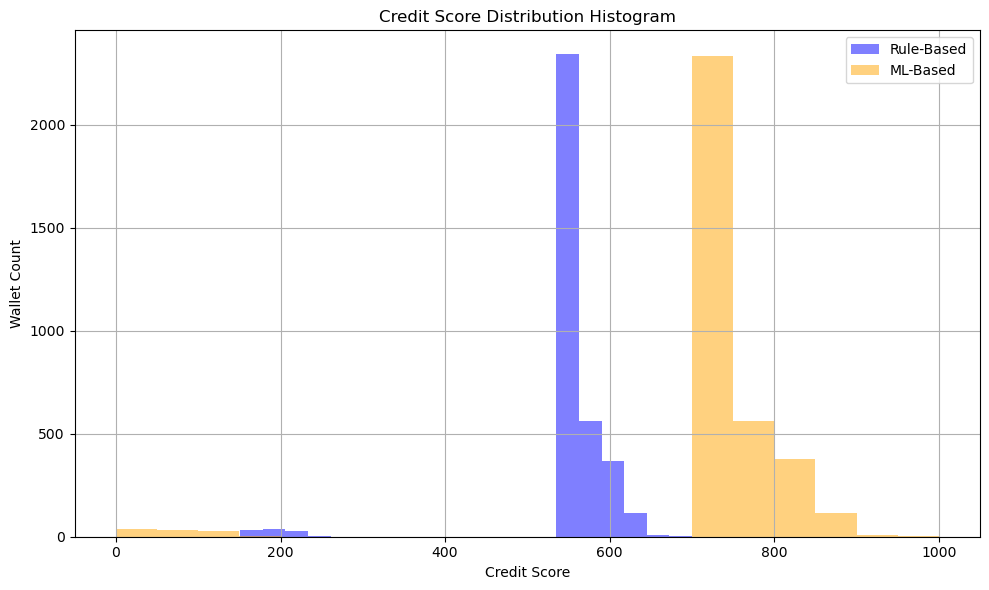

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['rule_based_score'], bins=20, alpha=0.5, label='Rule-Based', color='blue')
plt.hist(df['credit_score'], bins=20, alpha=0.5, label='ML-Based', color='orange')
plt.xlabel('Credit Score')
plt.ylabel('Wallet Count')
plt.title('Credit Score Distribution Histogram')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

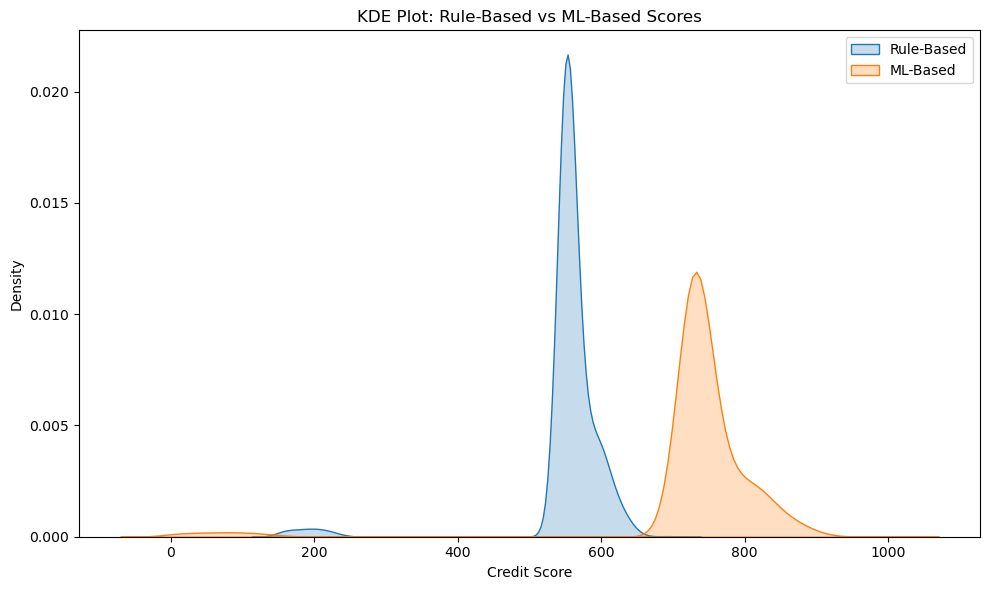

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['rule_based_score'], label='Rule-Based', fill=True)
sns.kdeplot(df['credit_score'], label='ML-Based', fill=True)
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('KDE Plot: Rule-Based vs ML-Based Scores')
plt.legend()
plt.tight_layout()
plt.show()

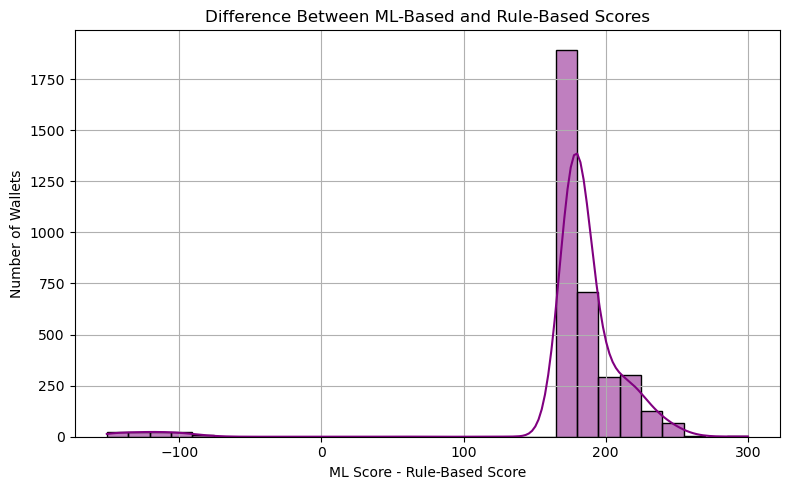

count    3497.000000
mean      179.071204
std        54.591475
min      -151.000000
25%       177.000000
50%       177.000000
75%       191.000000
max       300.000000
Name: score_diff, dtype: float64


In [ ]:
df['score_diff'] = df['credit_score'] - df['rule_based_score']
plt.figure(figsize=(8, 5))
sns.histplot(df['score_diff'], bins=30, kde=True, color='purple')
plt.title('Difference Between ML-Based and Rule-Based Scores')
plt.xlabel('ML Score - Rule-Based Score')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some stats
print(df['score_diff'].describe())


Correlation between Rule-Based and ML-Based Scores: 0.9997


Text(0.5, 1.0, 'Scatter Plot: Rule-Based vs ML-Based Scores')

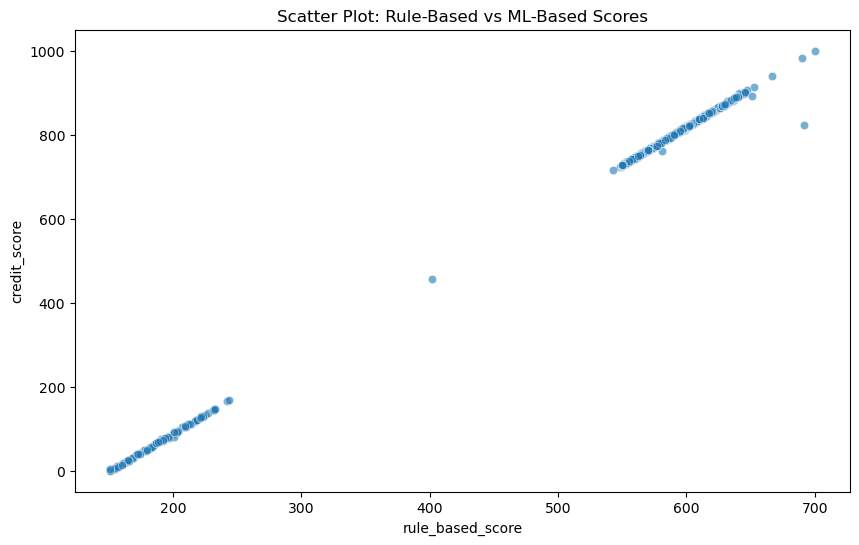

In [35]:
correlation = df['rule_based_score'].corr(df['credit_score'])
print(f"Correlation between Rule-Based and ML-Based Scores: {correlation:.4f}")
correlation= df['rule_based_score'].corr(df['credit_score'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rule_based_score', y='credit_score', data=df, alpha=0.6)
plt.title('Scatter Plot: Rule-Based vs ML-Based Scores')